In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPool2D

from tensorflow.keras.preprocessing import image

pd.set_option("display.max_columns", None)

2025-06-21 10:00:03.729241: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750500003.916755      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750500003.969421      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data Preprocessing

In [2]:
train_data_gen = ImageDataGenerator(rescale= 1.0/255,
                                   shear_range= 0.2,
                                   zoom_range= 0.2,
                                   horizontal_flip= True,
                                   vertical_flip= True,
                                   rotation_range= 20,
                                   width_shift_range= 0.2,
                                   height_shift_range= 0.2)

train_gen = train_data_gen.flow_from_directory('/kaggle/input/cotton-disease-dataset/Cotton Disease/train',
                                               target_size= (128, 128),
                                               batch_size= 32,
                                               class_mode= 'categorical',
                                              seed= 42,
                                              shuffle= True)

Found 1951 images belonging to 4 classes.


In [3]:
val_data_gen = ImageDataGenerator(rescale= 1.0/255)

val_gen = val_data_gen.flow_from_directory('/kaggle/input/cotton-disease-dataset/Cotton Disease/val',
                                               target_size= (128, 128),
                                               batch_size= 32,
                                               class_mode= 'categorical',
                                              seed= 42,
                                              shuffle= True)

Found 253 images belonging to 4 classes.


In [4]:
test_data_gen = ImageDataGenerator(rescale= 1.0/255)

test_gen = test_data_gen.flow_from_directory('/kaggle/input/cotton-disease-dataset/Cotton Disease/test',
                                               target_size= (128, 128),
                                               batch_size= 32,
                                               class_mode= 'categorical',
                                              seed= 42,
                                              shuffle= False)

Found 106 images belonging to 4 classes.


# Building the CNN Model

In [5]:
cnn = Sequential()

cnn.add(Conv2D(filters= 32, padding= 'same', kernel_size= 3, activation= 'relu', input_shape= [128, 128, 3]))

cnn.add(MaxPool2D(pool_size= 2, strides= 2))
cnn.add(Dropout(rate= 0.25))
cnn.add(Conv2D(filters= 32, padding= 'same', kernel_size= 3, activation= 'relu'))

cnn.add(Conv2D(filters= 64, padding= 'same', kernel_size= 3, activation= 'relu'))

cnn.add(MaxPool2D(pool_size= 2, strides= 2))
cnn.add(Dropout(rate= 0.25))
cnn.add(Flatten())

cnn.add(Dense(units= 128, activation= 'relu'))
cnn.add(Dense(units= 128, activation= 'relu'))
cnn.add(Dropout(rate= 0.25))
cnn.add(Flatten())

cnn.add(Dense(units= 128, activation= 'relu'))
cnn.add(Dense(units= 128, activation= 'relu'))
cnn.add(Dropout(rate= 0.25))

cnn.add(Dense(units= 4, activation= 'softmax'))

cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1750500017.916576      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,467,428 (32.30 MB)

 Trainable params: 8,467,428 (32.30 MB)

 Non-trainable params: 0 (0.00 B)

# Training the CNN model

In [6]:
cnn.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

hist = cnn.fit(train_gen, validation_data= val_gen, epochs= 20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1750500024.090922      79 service.cc:148] XLA service 0x7f1e5400f0c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750500024.091828      79 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750500024.561628      79 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/61 ━━━━━━━━━━━━━━━━━━━━ 8:48 9s/step - accuracy: 0.0938 - loss: 1.4089

I0000 00:00:1750500028.973784      79 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


61/61 ━━━━━━━━━━━━━━━━━━━━ 35s 431ms/step - accuracy: 0.3946 - loss: 1.3019 - val_accuracy: 0.4150 - val_loss: 1.1428
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 234ms/step - accuracy: 0.5248 - loss: 1.0832 - val_accuracy: 0.3794 - val_loss: 1.2395
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 230ms/step - accuracy: 0.5586 - loss: 1.0123 - val_accuracy: 0.5968 - val_loss: 0.9698
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 226ms/step - accuracy: 0.6027 - loss: 0.9214 - val_accuracy: 0.6640 - val_loss: 0.8218
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step - accuracy: 0.6546 - loss: 0.8223 - val_accuracy: 0.6482 - val_loss: 0.9136
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 231ms/step - accuracy: 0.6695 - loss: 0.8411 - val_accuracy: 0.6601 - val_loss: 0.8658
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 230ms/step - accuracy: 0.6851 - loss: 0.7705 - val_accuracy: 0.6957 - val_loss: 0.7767
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - accuracy: 0.7180 - loss: 0.7360 - val_accuracy: 0.719

# Visualizing the CNN model accuracy

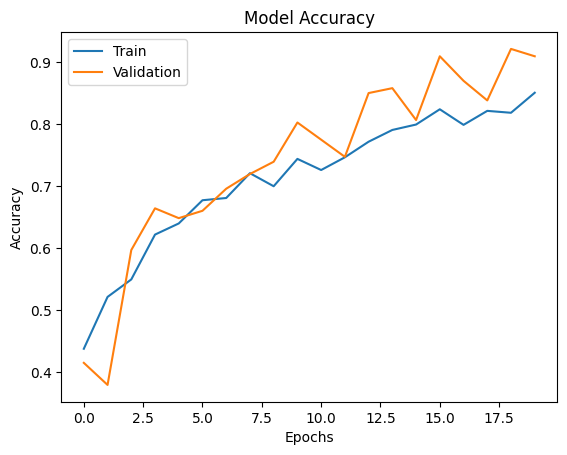

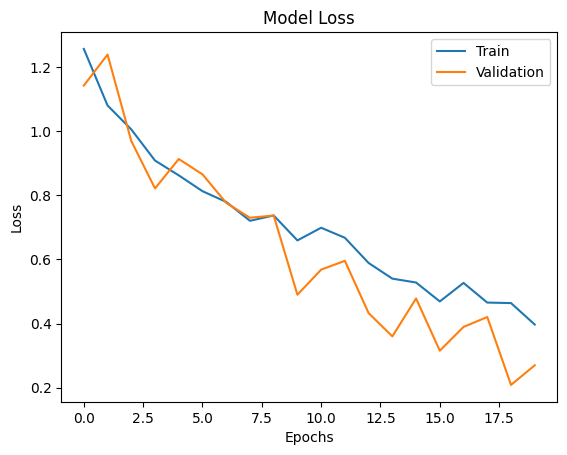

In [7]:
plt.plot(hist.history['accuracy'], label= 'Train')
plt.plot(hist.history['val_accuracy'], label= 'Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(hist.history['loss'], label= 'Train')
plt.plot(hist.history['val_loss'], label= 'Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()

# Evaluating CNN model

In [8]:
cnn.evaluate(val_gen)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.9078 - loss: 0.2474


[0.2698642611503601, 0.9090909361839294]

In [9]:
cnn.evaluate(test_gen)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 863ms/step - accuracy: 0.7981 - loss: 0.5230


[0.45962369441986084, 0.8207547068595886]

In [10]:
predictions = cnn.predict(test_gen)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)
y_true = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Print the predictions
print(y_pred)
print(y_true)
print(class_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 501ms/step
[0 0 1 0 1 0 0 1 0 3 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 3 1 1 1 1
 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 3 3 2 2 3 2 3 2 2 2 2 3 1 1 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
['diseased cotton leaf', 'diseased cotton plant', 'fresh cotton leaf', 'fresh cotton plant']


In [11]:
report = classification_report(y_true,y_pred,target_names=class_labels)
print(report)

                       precision    recall  f1-score   support

 diseased cotton leaf       1.00      0.68      0.81        25
diseased cotton plant       0.72      0.93      0.81        28
    fresh cotton leaf       1.00      0.69      0.82        26
   fresh cotton plant       0.74      0.96      0.84        27

             accuracy                           0.82       106
            macro avg       0.87      0.82      0.82       106
         weighted avg       0.86      0.82      0.82       106



# ResNet50 model

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3

# Building the ResNet50 model

In [13]:
resnet = ResNet50(weights= 'imagenet', include_top= False, input_shape= (128, 128, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [14]:
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization

for layer in resnet.layers:
    layer.trainable = False

# Adding custom layers on top of model
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

# Predictions
predictions = Dense(4, activation='softmax')(x)

# Building Model
model = Model(inputs=resnet.input, outputs=predictions)

model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,649,092 (94.03 MB)

 Trainable params: 1,056,260 (4.03 MB)

 Non-trainable params: 23,592,832 (90.00 MB)

# Training the ResNet50 Model

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = EarlyStopping(monitor='val_accuracy', patience=5, verbose=2,                 
                            mode='max', restore_best_weights=True)

hist = model.fit(train_gen, validation_data=val_gen, epochs=30, callbacks=[callbacks], verbose=2)

Epoch 1/30
61/61 - 41s - 667ms/step - accuracy: 0.4152 - loss: 1.5586 - val_accuracy: 0.3083 - val_loss: 1.3855
Epoch 2/30
61/61 - 14s - 227ms/step - accuracy: 0.4854 - loss: 1.3200 - val_accuracy: 0.3083 - val_loss: 1.4065
Epoch 3/30
61/61 - 13s - 221ms/step - accuracy: 0.4705 - loss: 1.2899 - val_accuracy: 0.3083 - val_loss: 1.4570
Epoch 4/30
61/61 - 14s - 230ms/step - accuracy: 0.5044 - loss: 1.1969 - val_accuracy: 0.3083 - val_loss: 1.4867
Epoch 5/30
61/61 - 14s - 226ms/step - accuracy: 0.5218 - loss: 1.1271 - val_accuracy: 0.3162 - val_loss: 1.2893
Epoch 6/30
61/61 - 14s - 231ms/step - accuracy: 0.5254 - loss: 1.1390 - val_accuracy: 0.4111 - val_loss: 1.3381
Epoch 7/30
61/61 - 14s - 222ms/step - accuracy: 0.5305 - loss: 1.1199 - val_accuracy: 0.3715 - val_loss: 1.2178
Epoch 8/30
61/61 - 14s - 227ms/step - accuracy: 0.5300 - loss: 1.0898 - val_accuracy: 0.4032 - val_loss: 1.1986
Epoch 9/30
61/61 - 14s - 229ms/step - accuracy: 0.5407 - loss: 1.1033 - val_accuracy: 0.4941 - val_loss:

# Visualizing the ResNet50 model accuracy

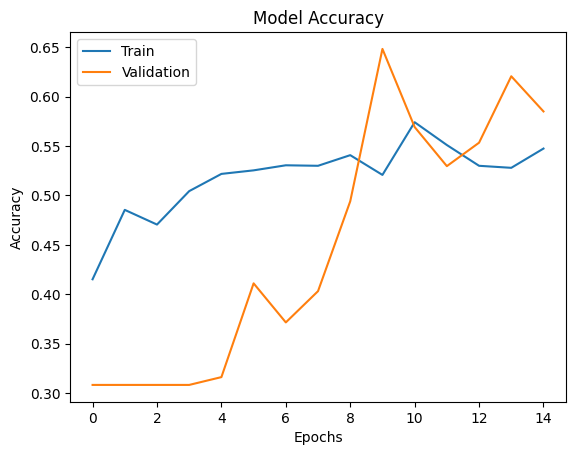

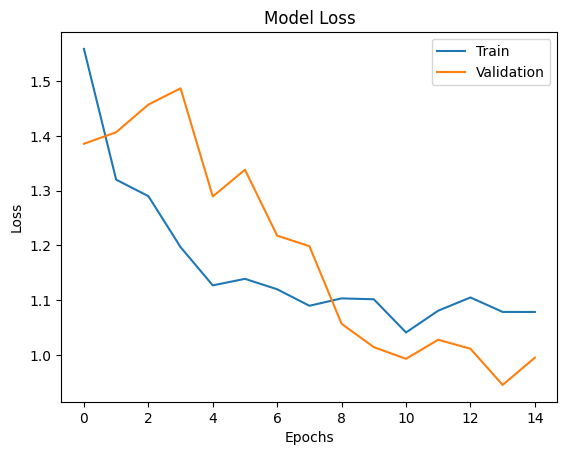

In [16]:
plt.plot(hist.history['accuracy'], label= 'Train')
plt.plot(hist.history['val_accuracy'], label= 'Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(hist.history['loss'], label= 'Train')
plt.plot(hist.history['val_loss'], label= 'Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()

# Evaluating the ResNet50 model

In [17]:
model.evaluate(val_gen)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.6949 - loss: 0.9750


[1.0143131017684937, 0.6482213735580444]

In [18]:
model.evaluate(test_gen)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5032 - loss: 1.2024


[1.0702933073043823, 0.5471698045730591]

In [19]:
# Make predictions on the test set
predictions = model.predict(test_gen)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)
y_true = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Print the predictions
print(y_pred)
print(y_true)
print(class_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step
[1 3 1 1 1 2 0 3 0 3 0 0 1 2 1 1 2 1 1 0 0 0 2 3 1 1 1 1 1 1 3 1 1 3 1 1 1
 1 1 1 1 2 3 1 1 3 1 1 3 3 1 1 1 3 2 3 2 2 3 3 3 2 3 2 1 2 2 2 2 1 3 3 2 2
 2 2 2 3 3 3 3 0 1 3 1 1 1 1 1 3 3 1 1 1 3 1 3 3 3 3 3 3 3 3 3 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
['diseased cotton leaf', 'diseased cotton plant', 'fresh cotton leaf', 'fresh cotton plant']


In [20]:
report = classification_report(y_true,y_pred,target_names=class_labels)
print(report)

                       precision    recall  f1-score   support

 diseased cotton leaf       0.88      0.28      0.42        25
diseased cotton plant       0.49      0.75      0.59        28
    fresh cotton leaf       0.74      0.54      0.62        26
   fresh cotton plant       0.44      0.59      0.51        27

             accuracy                           0.55       106
            macro avg       0.64      0.54      0.54       106
         weighted avg       0.63      0.55      0.54       106



# VGG_16 Model

In [21]:
vgg16 = VGG16(include_top= False, weights= 'imagenet', input_shape= (128, 128, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# Building the VGG_16 Model

In [22]:
for layer in vgg16.layers:
    layer.trainable = False

# Adding custom layers on top of model

x = vgg16.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(512, activation= 'relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

# Predictions
predictions1 = Dense(4, activation= 'softmax')(x)

# Building Model
model1 = Model(inputs= vgg16.input, outputs= predictions1)

model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 26,761,614 (102.09 MB)

 Trainable params: 1,056,260 (4.03 MB)

 Non-trainable params: 23,592,832 (90.00 MB)

 Optimizer params: 2,112,522 (8.06 MB)

# Training the VGG_16 Model

In [23]:
model1.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

callbacks = EarlyStopping(monitor= 'val_accuracy', patience= 3, verbose= 2, mode= 'max', restore_best_weights= True)

In [24]:
hist1 = model1.fit(train_gen, validation_data= val_gen, epochs= 30, callbacks= [callbacks], verbose= 2)

Epoch 1/30
61/61 - 30s - 484ms/step - accuracy: 0.6889 - loss: 0.8363 - val_accuracy: 0.5929 - val_loss: 0.9173
Epoch 2/30
61/61 - 14s - 237ms/step - accuracy: 0.7960 - loss: 0.5618 - val_accuracy: 0.6443 - val_loss: 0.7751
Epoch 3/30
61/61 - 14s - 237ms/step - accuracy: 0.8119 - loss: 0.4915 - val_accuracy: 0.6680 - val_loss: 0.6416
Epoch 4/30
61/61 - 15s - 253ms/step - accuracy: 0.8124 - loss: 0.4957 - val_accuracy: 0.8103 - val_loss: 0.4658
Epoch 5/30
61/61 - 15s - 246ms/step - accuracy: 0.8221 - loss: 0.4734 - val_accuracy: 0.8340 - val_loss: 0.4020
Epoch 6/30
61/61 - 14s - 236ms/step - accuracy: 0.8247 - loss: 0.4335 - val_accuracy: 0.8419 - val_loss: 0.3650
Epoch 7/30
61/61 - 15s - 242ms/step - accuracy: 0.8293 - loss: 0.4494 - val_accuracy: 0.9091 - val_loss: 0.2949
Epoch 8/30
61/61 - 16s - 257ms/step - accuracy: 0.8519 - loss: 0.4141 - val_accuracy: 0.8696 - val_loss: 0.2981
Epoch 9/30
61/61 - 15s - 238ms/step - accuracy: 0.8344 - loss: 0.4136 - val_accuracy: 0.9012 - val_loss:

# Visualizing the VGG_16 model accuracy

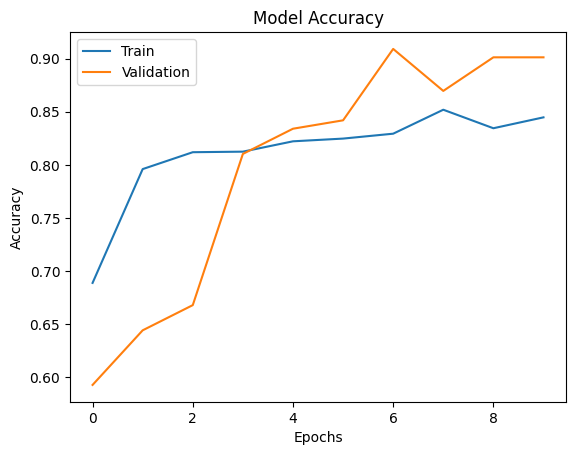

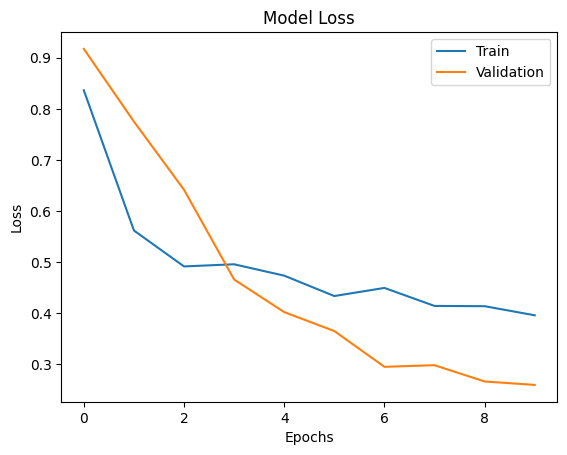

In [25]:
plt.plot(hist1.history['accuracy'], label= 'Train')
plt.plot(hist1.history['val_accuracy'], label= 'Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(hist1.history['loss'], label= 'Train')
plt.plot(hist1.history['val_loss'], label= 'Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating the VGG_16 model

In [26]:
model.evaluate(val_gen)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.6314 - loss: 1.0309


[1.014312982559204, 0.6482213735580444]

In [27]:
model.evaluate(test_gen)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 573ms/step - accuracy: 0.5032 - loss: 1.2024


[1.0702933073043823, 0.5471698045730591]

In [28]:
# Make predictions on the test set
predictions = model1.predict(test_gen)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)
y_true = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Print the predictions
print(y_pred)
print(y_true)
print(class_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 946ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 1 1 1 1 1 1 1 3 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 3 3 1 3 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 1 3 1 2 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
['diseased cotton leaf', 'diseased cotton plant', 'fresh cotton leaf', 'fresh cotton plant']


In [29]:
report = classification_report(y_true,y_pred,target_names=class_labels)
print(report)

                       precision    recall  f1-score   support

 diseased cotton leaf       1.00      0.92      0.96        25
diseased cotton plant       0.88      0.82      0.85        28
    fresh cotton leaf       0.89      0.96      0.93        26
   fresh cotton plant       0.79      0.85      0.82        27

             accuracy                           0.89       106
            macro avg       0.89      0.89      0.89       106
         weighted avg       0.89      0.89      0.89       106



# Inception_V3 model

In [30]:
inception = InceptionV3(include_top= False, weights= 'imagenet', input_shape= (128, 128, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# Building the Inception_V3 model

In [31]:
for layer in inception.layers:
    layer.trainable = False

# Adding custom layers on top of model
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(512, activation= 'relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

# Predictions
predictions2 = Dense(4, activation= 'softmax')(x)

# Building model
model2 = Model(inputs= inception.input, outputs= predictions2)

model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 26,761,614 (102.09 MB)

 Trainable params: 1,056,260 (4.03 MB)

 Non-trainable params: 23,592,832 (90.00 MB)

 Optimizer params: 2,112,522 (8.06 MB)

# Training the Inception_V3 model

In [32]:
model2.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

callbacks = EarlyStopping(monitor= 'val_accuracy', patience= 3, verbose=2, mode= 'max', restore_best_weights= True)

In [33]:
hist2 = model2.fit(train_gen, validation_data= val_gen, epochs= 30, callbacks= [callbacks], verbose= 2)

Epoch 1/30
61/61 - 52s - 847ms/step - accuracy: 0.6602 - loss: 1.0118 - val_accuracy: 0.7747 - val_loss: 0.6602
Epoch 2/30
61/61 - 15s - 238ms/step - accuracy: 0.7509 - loss: 0.6970 - val_accuracy: 0.8379 - val_loss: 0.4849
Epoch 3/30
61/61 - 15s - 244ms/step - accuracy: 0.7781 - loss: 0.6271 - val_accuracy: 0.8300 - val_loss: 0.4877
Epoch 4/30
61/61 - 14s - 234ms/step - accuracy: 0.7765 - loss: 0.5958 - val_accuracy: 0.8182 - val_loss: 0.4686
Epoch 5/30
61/61 - 14s - 232ms/step - accuracy: 0.7683 - loss: 0.5863 - val_accuracy: 0.8498 - val_loss: 0.4059
Epoch 6/30
61/61 - 14s - 229ms/step - accuracy: 0.7929 - loss: 0.5320 - val_accuracy: 0.8300 - val_loss: 0.4125
Epoch 7/30
61/61 - 14s - 230ms/step - accuracy: 0.8027 - loss: 0.5060 - val_accuracy: 0.8458 - val_loss: 0.4283
Epoch 8/30
61/61 - 15s - 238ms/step - accuracy: 0.8114 - loss: 0.4913 - val_accuracy: 0.8577 - val_loss: 0.3839
Epoch 9/30
61/61 - 14s - 229ms/step - accuracy: 0.8134 - loss: 0.5087 - val_accuracy: 0.8498 - val_loss:

# Visualizing the Inception_V3 Accuracy

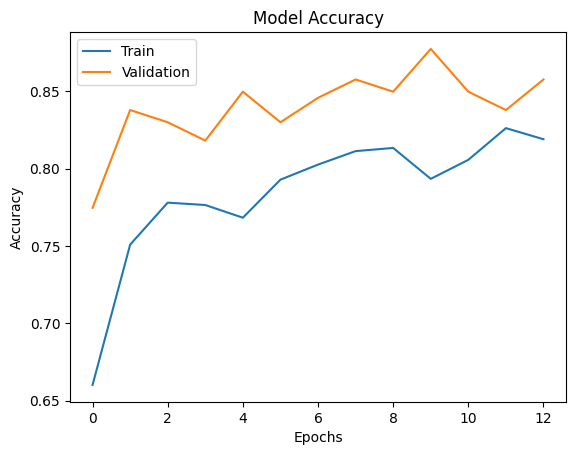

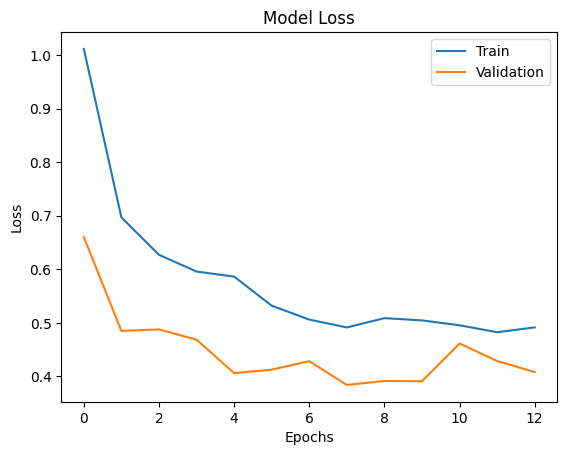

In [34]:
plt.plot(hist2.history['accuracy'], label= 'Train')
plt.plot(hist2.history['val_accuracy'], label= 'Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(hist2.history['loss'], label= 'Train')
plt.plot(hist2.history['val_loss'], label= 'Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating the Inception_V3 model

In [35]:
model.evaluate(val_gen)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.6561 - loss: 1.0458


[1.0143131017684937, 0.6482213735580444]

In [36]:
model.evaluate(test_gen)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 554ms/step - accuracy: 0.5032 - loss: 1.2024


[1.0702933073043823, 0.5471698045730591]

In [37]:
# Make predictions on the test set
predictions = model2.predict(test_gen)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)
y_true = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Print the predictions
print(y_pred)
print(y_true)
print(class_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step
[0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 1 2 0 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 1 3 3 3 3 3 0 3 3 1 3 2 3 1 1 3 3 1 3 1 3 1 1 3 3 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
['diseased cotton leaf', 'diseased cotton plant', 'fresh cotton leaf', 'fresh cotton plant']


In [38]:
report = classification_report(y_true,y_pred,target_names=class_labels)
print(report)

                       precision    recall  f1-score   support

 diseased cotton leaf       0.94      0.68      0.79        25
diseased cotton plant       0.75      0.96      0.84        28
    fresh cotton leaf       0.74      0.96      0.83        26
   fresh cotton plant       0.94      0.63      0.76        27

             accuracy                           0.81       106
            macro avg       0.84      0.81      0.81       106
         weighted avg       0.84      0.81      0.81       106

